# 전처리

In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd

colors = ["black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" ,"black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan", "darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan", "darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate"]
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Users/tmdwh/AppData/Local/Microsoft/Windows/Fonts/ACC어린이마음고운체.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 파일 읽어드리기

In [3]:
lib_in = pd.read_csv("데이터_단행본대출.csv", encoding = 'cp949') 
#-> 0번째 행을 index로 사용하겠다 열을 가지고 싶으면 index_row=0)
# encoding ->  'cp949' :한글 파일도 가져옴
print(lib_in.info())
print('-----------------------------------------------------------------------------------------')
lib_in = lib_in.dropna(how='any') #-> 하나라도 있으면 지움
print(lib_in.info())

#Errow -> column에 NaN 이 있거나 여러타입이 섞여 있으면 다음과 같이 나온다
#해결 방법 csv 읽을때  low_memory=False 추가
#C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165:
#DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
#  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581952 entries, 0 to 581951
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   대출일시    581952 non-null  object
 1   반납일시    581670 non-null  object
 2   등록번호    581952 non-null  object
 3   ISBN    577339 non-null  object
 4   서명      581952 non-null  object
 5   대출연장구분  581952 non-null  object
 6   연대출권수   581952 non-null  int64 
 7   입학년도    581952 non-null  int64 
 8   소속      581952 non-null  object
 9   상위소속    581555 non-null  object
dtypes: int64(2), object(8)
memory usage: 44.4+ MB
None
-----------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 576698 entries, 30 to 581951
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   대출일시    576698 non-null  object
 1   반납일시    576698 non-null  object
 2   등록번호    576698 non-null  object
 3

In [4]:
#year_borrow와 admission_year int 형이였음 좋겠음
lib_in['연대출권수'] = lib_in['연대출권수'].astype(int)
lib_in['입학년도'] = lib_in['입학년도'].astype(int)

#필요없는 열 지우기
lib_in= lib_in.drop([lib_in.columns[0],lib_in.columns[1],lib_in.columns[2],lib_in.columns[5],lib_in.columns[9]], axis= 1)
lib_in

,ISBN,서명,연대출권수,입학년도,소속
30,9788969940001,해뜨기 전이 가장 어둡다 :폐허의 철학자 에밀 시오랑의 절망의 팡세,130,2012,철학과
31,9788937473005,"주말, 출근, 산책 : 어두움과 비 :김엄지 장편소설",130,2012,철학과
32,9788996937432,자본주의 사회주의 민주주의,90,2014,금융경제학과
33,9788960863101,메시 :혼돈에서 탄생화는 극적인 결과,90,2014,금융경제학과
34,9788970551234,소유냐 삶이냐,90,2014,금융경제학과
...,...,...,...,...,...
581947,9791159055867,이질적인 선율들이 넘치는 세계 :다문화시대의 문학,18,2018,국어국문학과
581948,9788936477196,선량한 차별주의자,6,2021,국어국문학과
581949,9788962620696,카오스 :새로운 과학의 출현,56,2021,의생명시스템학부
581950,9791187142584,유한계급론,56,2021,의생명시스템학부


In [5]:
# 중복되는 데이터 지우기
# 가정 (year_borrow admission_year,department) -> primary_key
lib_in =lib_in.drop_duplicates(['연대출권수' ,'입학년도','소속'])
lib_in

,ISBN,서명,연대출권수,입학년도,소속
30,9788969940001,해뜨기 전이 가장 어둡다 :폐허의 철학자 에밀 시오랑의 절망의 팡세,130,2012,철학과
32,9788996937432,자본주의 사회주의 민주주의,90,2014,금융경제학과
35,9791125563006,블루밍 :박샛별 장편소설,29,2016,전기공학부
39,9791186289501,노동법 원포인트 판례 170선,49,2010,벤처중소기업학과
44,9788937460005,페스트,198,2013,벤처중소기업학과
...,...,...,...,...,...
580347,9788932916248,이데올로기 :문화 해부학 또는 하이퍼코드의 문제제기,5,2008,철학과
581178,9791158741365,디지털 신세계 메타버스를 선점하라 :앞으로 인류가 살아갈 가상 세계를 위한 새로운 ...,9,2021,건축학부
581435,9788936471200,시대의 증언자 쁘리모 레비를 찾아서,3,2021,국어국문학과
581777,9788930040587,뉴미디어와 정보사회 =New media in the information society,7,2021,언론홍보학과


##### 정제된 데이터 14158개

In [6]:
#index 재할당
lib_in.index = np.arange(len(lib_in))
lib_in

,ISBN,서명,연대출권수,입학년도,소속
0,9788969940001,해뜨기 전이 가장 어둡다 :폐허의 철학자 에밀 시오랑의 절망의 팡세,130,2012,철학과
1,9788996937432,자본주의 사회주의 민주주의,90,2014,금융경제학과
2,9791125563006,블루밍 :박샛별 장편소설,29,2016,전기공학부
3,9791186289501,노동법 원포인트 판례 170선,49,2010,벤처중소기업학과
4,9788937460005,페스트,198,2013,벤처중소기업학과
...,...,...,...,...,...
14153,9788932916248,이데올로기 :문화 해부학 또는 하이퍼코드의 문제제기,5,2008,철학과
14154,9791158741365,디지털 신세계 메타버스를 선점하라 :앞으로 인류가 살아갈 가상 세계를 위한 새로운 ...,9,2021,건축학부
14155,9788936471200,시대의 증언자 쁘리모 레비를 찾아서,3,2021,국어국문학과
14156,9788930040587,뉴미디어와 정보사회 =New media in the information society,7,2021,언론홍보학과


In [7]:
#학년별 연대출권수
admission_year_borrow = lib_in.groupby('입학년도')['연대출권수'].count()
print(admission_year_borrow.describe())
admission_year_borrow

count      36.000000
mean      393.277778
std       612.671136
min         1.000000
25%         3.000000
50%        13.000000
75%       580.500000
max      1744.000000
Name: 연대출권수, dtype: float64


입학년도
1973       2
1977       1
1979       1
1981       5
1983       3
1984       3
1989       3
1990       2
1991       2
1994       5
1995       3
1996       6
1998       2
1999      11
2000      14
2001       4
2002       6
2003      12
2004       8
2005      34
2006      26
2007      70
2008      98
2009     210
2010     416
2011     681
2012    1114
2013    1407
2014    1631
2015    1744
2016    1738
2017    1707
2018    1350
2019     958
2020     547
2021     334
Name: 연대출권수, dtype: int64

In [8]:
admission_year_borrow.index

Int64Index([1973, 1977, 1979, 1981, 1983, 1984, 1989, 1990, 1991, 1994, 1995,
            1996, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
            2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
            2019, 2020, 2021],
           dtype='int64', name='입학년도')

In [9]:
admission_year_borrow.values

array([   2,    1,    1,    5,    3,    3,    3,    2,    2,    5,    3,
          6,    2,   11,   14,    4,    6,   12,    8,   34,   26,   70,
         98,  210,  416,  681, 1114, 1407, 1631, 1744, 1738, 1707, 1350,
        958,  547,  334], dtype=int64)

Text(0, 0.5, 'year_borrow')

findfont: Font family ['ACCchildrenheartTTF'] not found. Falling back to DejaVu Sans.


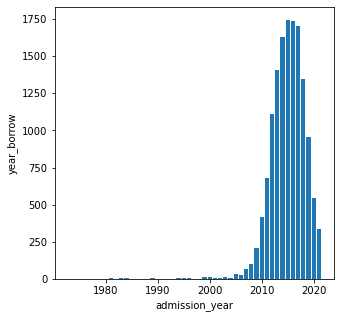

In [10]:
admission_year_list = admission_year_borrow.index.tolist()
#x = np.arange(len(admission_year_list)) #보기편하려고
x = admission_year_list
y = cnt_year_borrow = admission_year_borrow.values.tolist()


plt.figure(figsize=(5, 5)) #그래프의 크기조절
plt.bar(x,y, align = 'center')
plt.xlabel("admission_year")
plt.ylabel("year_borrow")


In [11]:
admission_year_ISBM = lib_in.groupby('입학년도')['ISBN']
#입학년도별 top
admission_year_ISBM.describe()

,count,unique,top,freq
입학년도,,,,
1973,2,1,9788989516231,2
1977,1.0,1.0,9788999400629.0,1.0
1979,1,1,9788959124220,1
1981,5,5,9788971153901,1
1983,3,3,9788963510002,1
1984,3,3,9791159310461,1
1989,3,3,9788947242448,1
1990,2,2,9791130620893,1
1991,2,2,9788964065532,1


In [12]:
#전체 베스트 셀러
item_count = lib_in['서명'].value_counts()[:10]
for idx, (val,cnt) in enumerate (item_count.iteritems(),1):
    print('Top',idx,":",val,cnt)

Top 1 : 미움받을 용기 45
Top 2 : 멋진 신세계 32
Top 3 : 채식주의자 :한강 연작소설 27
Top 4 : 데미안 25
Top 5 : 이방인 24
Top 6 : 미분적분학 =Calculus 24
Top 7 : 역사란 무엇인가 24
Top 8 : 나미야 잡화점의 기적 :히가시노 게이고 장편소설 23
Top 9 : 지적 대화를 위한 넓고 얕은 지식 :역사, 경제, 정치, 사회, 윤리 편 19
Top 10 : 1Q84 :무라카미 하루키 장편소설 19


In [13]:
admission_year_name = lib_in.groupby('입학년도')['서명']
admission_year_name.describe()[:10]

,count,unique,top,freq
입학년도,,,,
1973,2,1,그런 기독교는 없습니다:개혁주의 교리 강단:김성수목사 교리강해선,2
1977,1,1,사회복지실천론,1
1979,1,1,사회복지정책론 =Social welfare policy,1
1981,5,5,일곱 해의 마지막 :김연수 장편소설,1
1983,3,3,(예제 중심의 애플리케이션 개발을 위한) Qt5 프로그래밍 가이드,1
1984,3,3,"고대 동아시아 문명 교류사의 빛, 무령왕릉",1
1989,3,3,(2016) 전기공사기사 실기,1
1990,2,2,돈 공부는 처음이라: 0원부터 시작하는 난생처음 부자 수업,1
1991,2,2,(김조영 변호사의) 쉽게 푸는 재건축 재개발.1,1


In [14]:
b_2017 = lib_in[lib_in['입학년도']== 2017]

In [16]:
b_2017[:10]

,ISBN,서명,연대출권수,입학년도,소속
520,9788954643436,나의 친애하는 적 :허지웅 에세이,19,2017,소프트웨어학부
544,9788901050171,괴짜경제학,15,2017,회계학과
557,9788970342368,눈은 1분 만에 좋아진다 :하루 1분 기적의 시력 회복법,15,2017,철학과
576,9791187038016,왜 학교는 질문을 가르치지 않는가 :어느 시골교사가 세상에 물음을 제기하는 방법,50,2017,예술창작학부 영화예술전공
577,9788994543741,2016-2018 대한민국 부동산 대전망,49,2017,경영학부
579,9788972731399,함석헌과 이성의 해방,2,2017,법학과
619,9791130435336,"언론고시, 하우 투 패스 :2015년 개정판",9,2017,정치외교학과
856,9788954625173,불륜 :파울로 코엘료 장편소설,18,2017,의생명시스템학부
966,9788970135359,문화부족의 사회:히피에서 폐인까지,20,2017,언론홍보학과
999,9788970133737,바자제·페드르,61,2017,불어불문학과


In [17]:
item_count = b_2017['서명'].value_counts()[:10]
for idx, (val,cnt) in enumerate (item_count.iteritems(),1):
    print('Top',idx,":",val,cnt)

Top 1 : 사회계약론 8
Top 2 : 변신:프란츠 카프카 소설 6
Top 3 : 돈으로 살 수 없는 것들 6
Top 4 : (표준)일반화학실험 5
Top 5 : 채식주의자 :한강 연작소설 5
Top 6 : 일반화학실험 5
Top 7 : 미움받을 용기 5
Top 8 : 이방인 5
Top 9 : 옛사람들의 세상 읽기 :그리스 신화 4
Top 10 : 위대한 개츠비 4


In [18]:
exist_year = []
for year in lib_in['입학년도']:
    exist_year.append(year)
    
#중복제거
tmp_set = set(exist_year) #집합set으로 변환
exist_year = list(tmp_set) #list로 변환
print(exist_year)

[1973, 1977, 1979, 1981, 1983, 1984, 1989, 1990, 1991, 1994, 1995, 1996, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


In [19]:
#00~ 21
best_seller_dataframe = []
for year in exist_year:
    if (year < 2000):
        continue
    else:
        tmp_data_frame = lib_in[lib_in['입학년도']== year]
        best_seller_dataframe.append(pd.DataFrame(data= tmp_data_frame))

In [20]:
#학번 별 베스트 셀러(2000~2021)

for index_num in range(0,len(best_seller_dataframe)):
    if int(best_seller_dataframe[index_num]['입학년도'].mean()) > 2017:
        print("-------------------------",int(best_seller_dataframe[index_num]['입학년도'].mean()),"-------------------------")
        test = best_seller_dataframe[index_num]["서명"]
        item_count = test.value_counts()[:10]
        for idx, (val,cnt) in enumerate (item_count.iteritems(),1):
            print("")
            print('Top',idx,":",val,cnt)
        print("")

------------------------- 2018 -------------------------

Top 1 : 이방인 9

Top 2 : 사회계약론 7

Top 3 : 미움받을 용기 6

Top 4 : 김회권 목사의 청년 설교 6

Top 5 : 변신 6

Top 6 : 미분적분학 =Calculus 6

Top 7 : 변신:프란츠 카프카 소설 5

Top 8 : 국가란 무엇인가 4

Top 9 : 살인자의 기억법 :김영하 장편소설 4

Top 10 : 一般國法學 4

------------------------- 2019 -------------------------

Top 1 : 현대인과 성서 9

Top 2 : (캠벨) 생명과학 6

Top 3 : 나미야 잡화점의 기적 :히가시노 게이고 장편소설 4

Top 4 : (Rosen의) 이산수학 4

Top 5 : 죄와 벌 4

Top 6 : 일반화학 4

Top 7 : 변신:프란츠 카프카 소설 4

Top 8 : 향연 4

Top 9 : 미움받을 용기 3

Top 10 : 서양고대철학 3

------------------------- 2020 -------------------------

Top 1 : 멋진 신세계 10

Top 2 : 역사란 무엇인가 6

Top 3 : 어린 왕자 5

Top 4 : 파우스트 5

Top 5 : 향연 3

Top 6 : 글로벌 무역학개론 3

Top 7 : 새로운 아틀란티스 3

Top 8 : 제3의 물결 3

Top 9 : 필경사 바틀비 3

Top 10 : 현대인과 성서 3

------------------------- 2021 -------------------------

Top 1 : 역사란 무엇인가 8

Top 2 : 멋진 신세계 7

Top 3 : 미분적분학 =Calculus 5

Top 4 : 초예측 :세계 석학 8인에게 인류의 미래를 묻다 4

Top 5 : 아니야, 우리가 미안하다 :따뜻한 신념으로 일군 작은 기적, 천종호 판사의 소년재판 이야기

##### 학년 데이터를 뽑을 수가 없음 ㅠㅠ

In [22]:
lib_in

,ISBN,서명,연대출권수,입학년도,소속
0,9788969940001,해뜨기 전이 가장 어둡다 :폐허의 철학자 에밀 시오랑의 절망의 팡세,130,2012,철학과
1,9788996937432,자본주의 사회주의 민주주의,90,2014,금융경제학과
2,9791125563006,블루밍 :박샛별 장편소설,29,2016,전기공학부
3,9791186289501,노동법 원포인트 판례 170선,49,2010,벤처중소기업학과
4,9788937460005,페스트,198,2013,벤처중소기업학과
...,...,...,...,...,...
14153,9788932916248,이데올로기 :문화 해부학 또는 하이퍼코드의 문제제기,5,2008,철학과
14154,9791158741365,디지털 신세계 메타버스를 선점하라 :앞으로 인류가 살아갈 가상 세계를 위한 새로운 ...,9,2021,건축학부
14155,9788936471200,시대의 증언자 쁘리모 레비를 찾아서,3,2021,국어국문학과
14156,9788930040587,뉴미디어와 정보사회 =New media in the information society,7,2021,언론홍보학과


In [23]:
group_lib_in = lib_in.groupby(['소속','입학년도'])
group_lib_in.size()

소속      입학년도
AI융합학부  2011     2
        2012     6
        2013    14
        2014     5
        2015    35
                ..
회계학과    2017    30
        2018    26
        2019    16
        2020    15
        2021     9
Length: 697, dtype: int64

In [24]:
dic_lib = dict(list(group_lib_in))

In [28]:
lib_in

,ISBN,서명,연대출권수,입학년도,소속
0,9788969940001,해뜨기 전이 가장 어둡다 :폐허의 철학자 에밀 시오랑의 절망의 팡세,130,2012,철학과
1,9788996937432,자본주의 사회주의 민주주의,90,2014,금융경제학과
2,9791125563006,블루밍 :박샛별 장편소설,29,2016,전기공학부
3,9791186289501,노동법 원포인트 판례 170선,49,2010,벤처중소기업학과
4,9788937460005,페스트,198,2013,벤처중소기업학과
...,...,...,...,...,...
14153,9788932916248,이데올로기 :문화 해부학 또는 하이퍼코드의 문제제기,5,2008,철학과
14154,9791158741365,디지털 신세계 메타버스를 선점하라 :앞으로 인류가 살아갈 가상 세계를 위한 새로운 ...,9,2021,건축학부
14155,9788936471200,시대의 증언자 쁘리모 레비를 찾아서,3,2021,국어국문학과
14156,9788930040587,뉴미디어와 정보사회 =New media in the information society,7,2021,언론홍보학과


In [29]:
tmp_lib_in= lib_in.drop([lib_in.columns[0],lib_in.columns[2]], axis= 1)
tmp_lib_in

,서명,입학년도,소속
0,해뜨기 전이 가장 어둡다 :폐허의 철학자 에밀 시오랑의 절망의 팡세,2012,철학과
1,자본주의 사회주의 민주주의,2014,금융경제학과
2,블루밍 :박샛별 장편소설,2016,전기공학부
3,노동법 원포인트 판례 170선,2010,벤처중소기업학과
4,페스트,2013,벤처중소기업학과
...,...,...,...
14153,이데올로기 :문화 해부학 또는 하이퍼코드의 문제제기,2008,철학과
14154,디지털 신세계 메타버스를 선점하라 :앞으로 인류가 살아갈 가상 세계를 위한 새로운 ...,2021,건축학부
14155,시대의 증언자 쁘리모 레비를 찾아서,2021,국어국문학과
14156,뉴미디어와 정보사회 =New media in the information society,2021,언론홍보학과


In [30]:
tmp_group_lib_in = tmp_lib_in.groupby(['소속','입학년도'])

tmp_dic_lib = dict(list(tmp_group_lib_in))

In [31]:
tmp_dic_lib.keys()

dict_keys([('AI융합학부', 2011), ('AI융합학부', 2012), ('AI융합학부', 2013), ('AI융합학부', 2014), ('AI융합학부', 2015), ('AI융합학부', 2016), ('AI융합학부', 2017), ('AI융합학부', 2018), ('AI융합학부', 2019), ('AI융합학부', 2020), ('AI융합학부', 2021), ('건축학부', 1995), ('건축학부', 1999), ('건축학부', 2000), ('건축학부', 2003), ('건축학부', 2005), ('건축학부', 2007), ('건축학부', 2008), ('건축학부', 2009), ('건축학부', 2010), ('건축학부', 2011), ('건축학부', 2012), ('건축학부', 2013), ('건축학부', 2014), ('건축학부', 2015), ('건축학부', 2016), ('건축학부', 2017), ('건축학부', 2018), ('건축학부', 2019), ('건축학부', 2020), ('건축학부', 2021), ('경영학부', 2000), ('경영학부', 2006), ('경영학부', 2007), ('경영학부', 2008), ('경영학부', 2009), ('경영학부', 2010), ('경영학부', 2011), ('경영학부', 2012), ('경영학부', 2013), ('경영학부', 2014), ('경영학부', 2015), ('경영학부', 2016), ('경영학부', 2017), ('경영학부', 2018), ('경영학부', 2019), ('경영학부', 2020), ('경영학부', 2021), ('경제학과', 1999), ('경제학과', 2006), ('경제학과', 2007), ('경제학과', 2008), ('경제학과', 2009), ('경제학과', 2010), ('경제학과', 2011), ('경제학과', 2012), ('경제학과', 2013), ('경제학과', 2014), ('경제학과', 2015), ('경제학과', 2016), ('경제학과'

In [33]:
print(tmp_dic_lib[('건축학부',2018)]['서명'].count())
print(tmp_dic_lib[('건축학부',2018)]['서명'])

35
6734                                               대학물리학실험
6745                          대학물리실험 =Physics experiment.1
6910                        건축, 음악처럼 듣고 미술처럼 보다 :인문적 건축이야기
7102                             마음가는 대로=follow your heart
7346                                 세계 최고의 학교는 왜 인성에 집중할까
7412                        건축, 음악처럼 듣고 미술처럼 보다 :인문적 건축이야기
7413     기초 건축설계 프로세스 =Process of basic architectural d...
7547                                                  도시계획
7629             현대 건축을 바꾼 두 거장 :프랭크 로이드 라이트 vs 미스 반 데어 로에
7737                  연탄길 :마음을 치유해주는 우리 이웃들의 가슴 따뜻한 실제 이야기
7794                    도시는 무엇으로 사는가 :도시를 보는 열다섯 가지 인문적 시선
7858                                           변신 :카프카 단편선
7874                                       차라투스트라는 이렇게 말했다
8063                                배흘림기둥의 고백 :옛건축의 창조와 진화
8397                   하우징 디자인 핸드북=Housing design handbook
8458                                                 레미제라블
8544        실전에 바로 써먹는 왕초보 주식투자 200문 200답:대한민국 대표 주식투

In [34]:
len(dic_lib.keys())

697

In [35]:
x = dic_lib.keys()
x_val =  np.arange(len(dic_lib.keys()))
y_val = []
count= 0
for x in dic_lib.keys():
    count += 1
    y_val.append(int(tmp_dic_lib[(x)]['서명'].count()))

<BarContainer object of 697 artists>

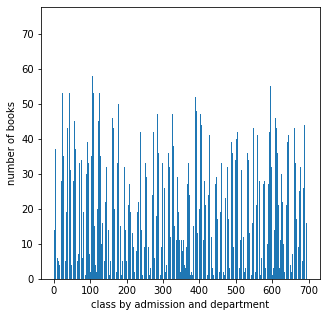

In [40]:
plt.figure(figsize=(5, 5)) #그래프의 크기조절
plt.xlabel("class by admission and department")
plt.ylabel("number of books")
plt.bar(x_val,y_val, align = 'center')